<a href="https://colab.research.google.com/github/Fawad98/Data-Science-Projects/blob/main/Penguine_Species_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv

penguins = pd.read_csv('penguins.csv')

sample = penguins.sample(10)
sample

--2022-12-07 06:45:51--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7086 (6.9K) [text/plain]
Saving to: ‘penguins.csv.1’

penguins.csv.1      100%[===================>]   6.92K  --.-KB/s    in 0s      

2022-12-07 06:45:51 (56.2 MB/s) - ‘penguins.csv.1’ saved [7086/7086]



,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
146,39.2,18.6,190.0,4250.0,0
41,40.8,18.4,195.0,3900.0,0
316,49.0,19.5,210.0,3950.0,2
92,34.0,17.1,185.0,3400.0,0
192,42.7,13.7,208.0,3950.0,1
165,48.4,14.6,213.0,5850.0,1
67,41.1,19.1,188.0,4100.0,0
333,49.3,19.9,203.0,4050.0,2
56,39.0,17.5,186.0,3550.0,0
111,45.6,20.3,191.0,4600.0,0


In [3]:
penguins_classes = ['Adelie', 'Gentoo', 'Chinstrap']
print(sample.columns[0:5].values, 'SpeciesName')
for index, row in penguins.sample(10).iterrows():
  print('[', row[0], row[1], row[2], row[3], int(row[4]), ']', penguins_classes[int(row[4])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 37.9 18.6 193.0 2925.0 0 ] Adelie
[ 50.8 19.0 210.0 4100.0 2 ] Chinstrap
[ 39.7 18.4 190.0 3900.0 0 ] Adelie
[ 37.2 19.4 184.0 3900.0 0 ] Adelie
[ 36.0 17.8 195.0 3450.0 0 ] Adelie
[ 49.1 14.8 220.0 5150.0 1 ] Gentoo
[ 45.2 15.8 215.0 5300.0 1 ] Gentoo
[ 50.4 15.3 224.0 5550.0 1 ] Gentoo
[ 37.6 19.1 194.0 3750.0 0 ] Adelie
[ 43.3 14.0 208.0 4575.0 1 ] Gentoo


In [4]:
penguins.isnull().sum()

CulmenLength     2
CulmenDepth      2
FlipperLength    2
BodyMass         2
Species          0
dtype: int64

In [5]:
penguins[penguins.isnull().any(axis=1)]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


In [6]:
penguins = penguins.dropna()

penguins.isnull().sum()

CulmenLength     0
CulmenDepth      0
FlipperLength    0
BodyMass         0
Species          0
dtype: int64

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

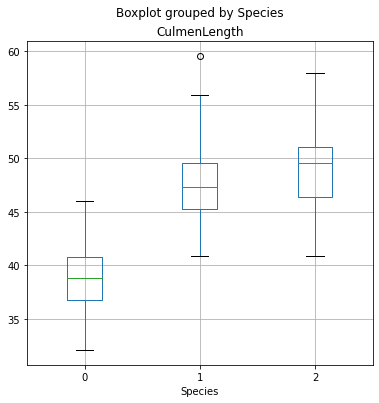

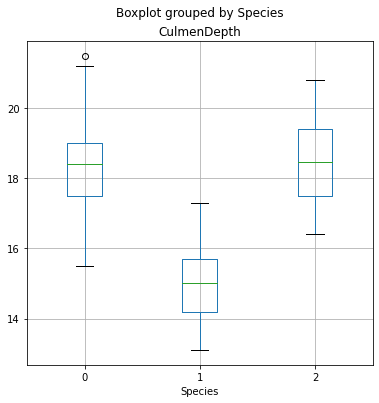

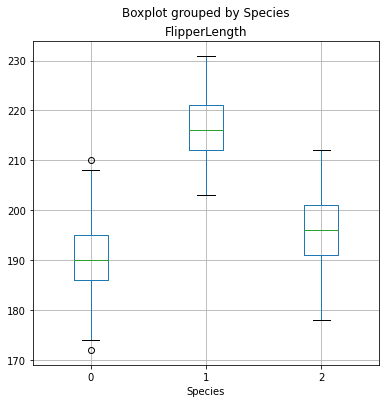

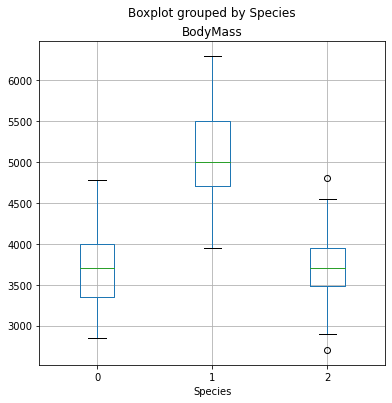

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

penguine_features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
penguine_label = 'Species'

for col in penguine_features:
  penguins.boxplot(column=col, by=penguine_label, figsize=(6,6))
  plt.title(col)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

penguine_x, penguine_y = penguins[penguine_features].values, penguins[penguine_label].values

X_train, X_test, y_train, y_test = train_test_split(penguine_x, penguine_y, test_size=0.30, random_state=0, stratify=penguine_y)
print ('Training Set: %d, Test Set: %d \n' % (X_train.shape[0], y_test.shape[0]))

Training Set: 239, Test Set: 103 



In [9]:
from sklearn.linear_model import LogisticRegression

reg = 0.1

multi_model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=10000).fit(X_train, y_train)
print (multi_model)

LogisticRegression(C=10.0, max_iter=10000)


In [10]:
penguin_predictions =  multi_model.predict(X_test)
print('Predicted Labels:', penguin_predictions[:15])
print('Actual Labels:', y_test[:15])

Predicted Labels: [0 1 0 2 2 1 1 1 0 2 2 1 2 1 2]
Actual Labels: [0 1 2 2 2 1 1 1 0 2 2 1 2 1 2]


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, penguin_predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       1.00      1.00      1.00        37
           2       0.95      0.90      0.93        21

    accuracy                           0.97       103
   macro avg       0.97      0.96      0.96       103
weighted avg       0.97      0.97      0.97       103



In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_test, penguin_predictions))
print("Overall Precision:",precision_score(y_test, penguin_predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, penguin_predictions, average='macro'))

Overall Accuracy: 0.970873786407767
Overall Precision: 0.9688405797101449
Overall Recall: 0.9608465608465608


In [13]:
from sklearn.metrics import confusion_matrix
mcm = confusion_matrix(y_test, penguin_predictions)
print(mcm)


[[44  0  1]
 [ 0 37  0]
 [ 2  0 19]]


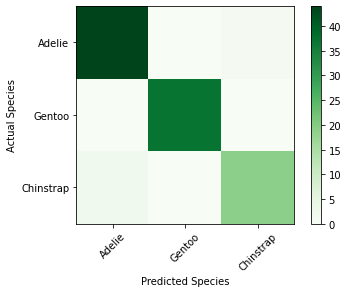

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(mcm, interpolation='nearest', cmap = plt.cm.Greens)
plt.colorbar()
tick_marks = np.arange(len(penguins_classes))
plt.xticks(tick_marks, penguins_classes, rotation=45)
plt.yticks(tick_marks, penguins_classes)

plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.show()

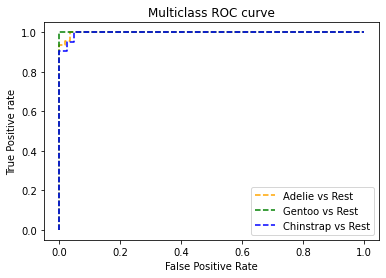

In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Get class probability scores
penguin_prob = multi_model.predict_proba(X_test)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(penguins_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, penguin_prob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=penguins_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=penguins_classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=penguins_classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [16]:
auc = roc_auc_score(y_test,penguin_prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.9981999902100828


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

feature_columns = [0,1,2,3]
feature_transformer = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers = [
        ('preprocess', feature_transformer, feature_columns)
    ]
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', SVC(probability=True))])

multi_model = pipeline.fit(X_train, y_train)
print(multi_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3])])),
                ('regressor', SVC(probability=True))])


Overall Accuracy: 0.9805825242718447
Overall Precision: 0.9767195767195768
Overall Recall: 0.9767195767195768
Overall Accuracy: 0.9990361381446328


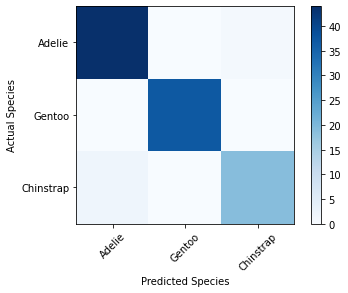

In [18]:
penguin_predictions = multi_model.predict(X_test)
penguin_prob = multi_model.predict_proba(X_test)

print('Overall Accuracy:', accuracy_score(y_test, penguin_predictions))
print('Overall Precision:', precision_score(y_test, penguin_predictions,average='macro'))
print('Overall Recall:', recall_score(y_test, penguin_predictions, average='macro'))
print('Overall Accuracy:', roc_auc_score(y_test, penguin_prob, multi_class='ovr'))

plt.imshow(mcm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguins_classes))
plt.xticks(tick_marks, penguins_classes, rotation=45)
plt.yticks(tick_marks, penguins_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [19]:
import joblib

filename = "./penguin_model.pkl"
joblib.dump(multi_model, filename)

['./penguin_model.pkl']

In [20]:
multi_model = joblib.load(filename)

x_new = np.array([[0.4,0,0,0]])
print('New Sample:{}'.format(x_new[0]))

penguin_pred = multi_model.predict(x_new)[0]
print('Predicted Class is ', penguins_classes[penguin_pred])

New Sample:[0.4 0.  0.  0. ]
Predicted Class is  Adelie
